## Обзор данных

In [1]:
# загружаем необходимые библиотеки
import pandas as pd 
import numpy as np 
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data.head(10) # выводим первые 10 строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info() # анализируем общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


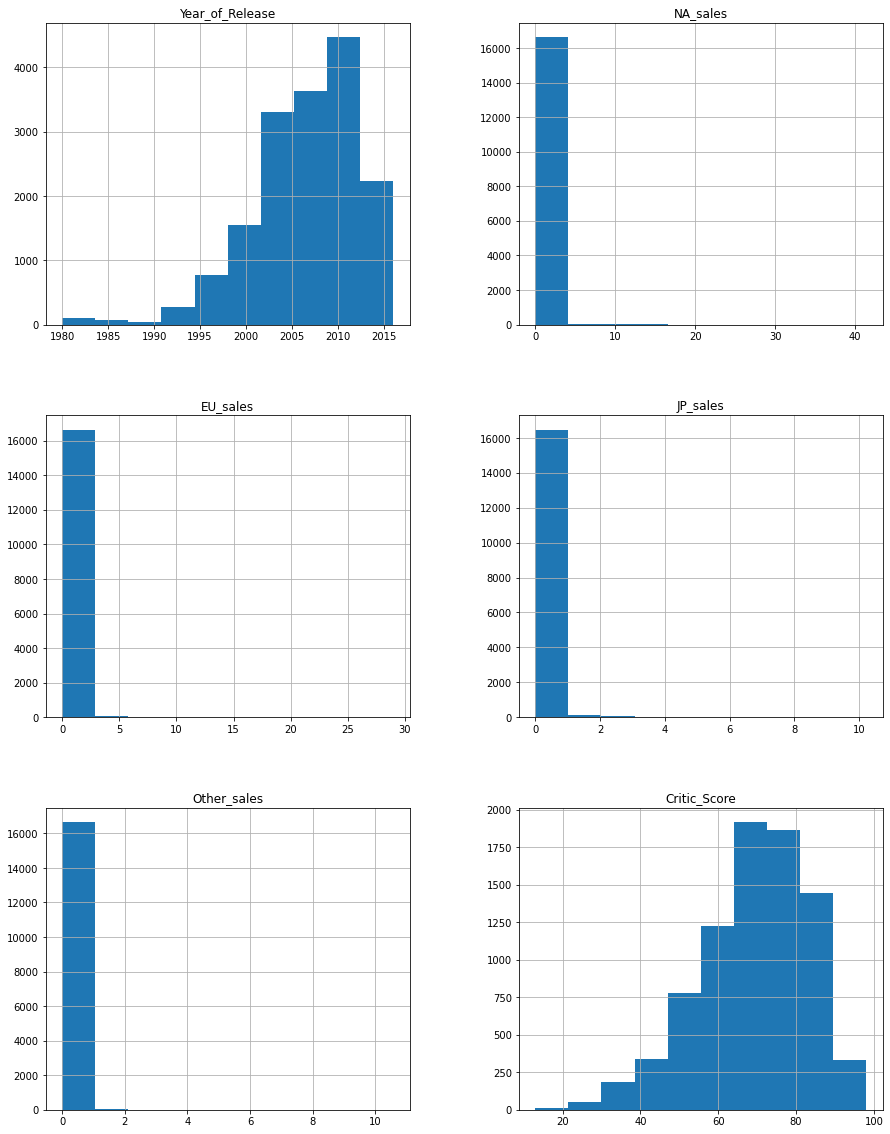

In [4]:
data.hist(figsize=(15, 20)); # строим гистограммы для всех столбцов с количественными данными

In [5]:
data.describe().style.format("{:,.2f}") # анализируем расчетные показатели столбцов с количественными данными

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


### Вывод
Исходный датафрейм состоит из 16715 строк, 11 столбцов. Тип данных - float64(6), object(5). Часть столбцов имеет пропущенные данные и ошибочный тип данных. Наименование столбцов оформлено в соответствии со стилем написания Snake case (змеиный регистр), но с использованием прописных и строчных букв, поэтому требует переименования. Гистограммы, а также максимальные значения по столбцам (в сравнении со средними и медианными значениями) свидетельствуют о наличии аномальных выбросов в представленных данных.

## Предобработка данных

### Переименование столбцов

In [6]:
data.columns # выведем наименование столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
data.columns = data.columns.str.lower() # приводим наименование столбцов к нижнему регистру

In [8]:
data.columns # проверяем результат переименования столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменение типов данных и обработка пропусков

Из предварительного обзора данных видно, что в столбцах user_score и year_of_release данные имеют ошибочный тип - object и float соответственно. С целью более детального рассмотрения содержания столбцов выведем уникальные значения в столбце user_score.

In [9]:
# выводим отсортированный список уникальных наименований в столбце user_score
data['user_score'].sort_values().unique() 

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [10]:
# подсчитаем количество tbd в строках
data.loc[data['user_score'] == 'tbd'].count()

name               2424
platform           2424
year_of_release    2376
genre              2424
na_sales           2424
eu_sales           2424
jp_sales           2424
other_sales        2424
critic_score       1082
user_score         2424
rating             2374
dtype: int64

In [11]:
# рассмотрим зависимость появления tbd в зависимости от года выпуска игры

data.loc[data['user_score'] == 'tbd'].sort_values(by='year_of_release', ascending = True).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12833,Elemental Gearbolt,PS,1997.0,Shooter,0.03,0.02,0.0,0.00,76.0,tbd,T
3028,Pro Pinball: Big Race USA,PS,1999.0,Simulation,0.37,0.25,0.0,0.04,69.0,tbd,E
2234,SnoCross Championship Racing,PS,1999.0,Racing,0.52,0.35,0.0,0.06,66.0,tbd,E
10226,Breakout,PS,1999.0,Puzzle,0.06,0.04,0.0,0.01,NaN,tbd,E
4223,Razor Freestyle Scooter,PS,1999.0,Sports,0.26,0.17,0.0,0.03,65.0,tbd,E


In [12]:
data.loc[data['user_score'] == 'tbd'].sort_values(by='year_of_release', ascending = False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15142,Rugby Challenge 3,X360,2016.0,Sports,0.00,0.02,0.00,0.00,NaN,tbd,E
9805,Destiny: The Collection,XOne,2016.0,Shooter,0.05,0.06,0.00,0.01,NaN,tbd,T
13436,Just Dance 2017,PS3,2016.0,Misc,0.01,0.03,0.00,0.01,NaN,tbd,E10+
16267,The Book of Unwritten Tales 2,WiiU,2016.0,Adventure,0.00,0.01,0.00,0.00,NaN,tbd,T
16248,Azure Striker Gunvolt: Striker Pack,3DS,2016.0,Action,0.00,0.00,0.01,0.00,NaN,tbd,T


Помимо пропущенных значений в столбце user_score содержаться данные типа tbd (в 2424 строках) - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. При этом видно, что появление значения tbd не зависит от года выпуска игры и встречается, как в играх 2016 г., так и в играх 1997-1999 гг. Поэтому приравняем tbd к пропускам (nan).

In [13]:
data['user_score'].replace('tbd', np.nan, inplace=True) # заменим tbd на nan
data['user_score'] = data['user_score'].astype(float) 
# меняем тип данных в столбце user_score с object на float

In [14]:
data['user_score'].sort_values().unique() # проверяем замену tbd на nan

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

In [15]:
# оценим количество и долю пропущенных значений по столбцам
data.isna().agg(['mean', 'sum']).style.format("{:,.3f}") 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
mean,0.000,0.000,0.016,0.000,0.000,0.000,0.000,0.000,0.513,0.546,0.405
sum,2.000,0.000,269.000,2.000,0.000,0.000,0.000,0.000,"8,578.000","9,125.000","6,766.000"


In [16]:
# построим график пропущенных значений по столбца в процентах
def pass_value_barh(data):
    try:
        (
            (data.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Доля пропущенных значений, %' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

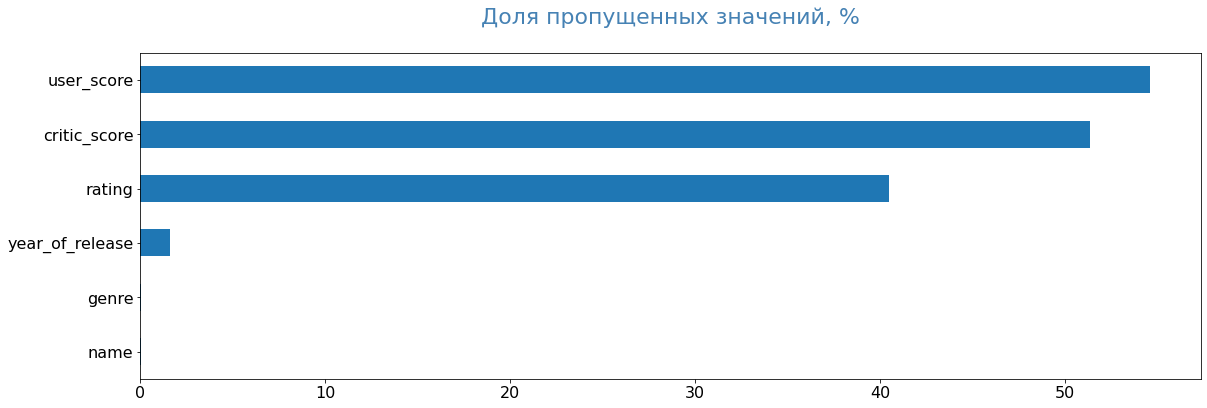

In [17]:
pass_value_barh(data)

Из таблицы и графика пропущенных значений видно, что количество и доля пропусков в столбцах genre и name одинаковое и критически низкое (по 2 значения или 0,01%). Доля пропущенных значений в столбце year_of_release составляет 1,6% (=269 значений), заполнение пропусков средними значениями может быть некорректным, ручной поиск и ввод трудоемким. Таким образом, видится целесообразным удаление пропущенных значений в столбцах year_of_release, genre и name.

In [18]:
# удаляем пропущенные значения из столбцов
data = data.dropna(subset=['genre', 'name', 'year_of_release']) 

In [19]:
data['year_of_release'] = data['year_of_release'].astype(int)
# меняем тип данных в столбце year_of_release с float на int

In [20]:
data.info() # проверяем результат изменения типа данных и удаления пропущенных значений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Таким образом, пропущенные значения остались в 3 столбцах: critic_score, user_score с типом данных float, а значит, теоретически пропуски могут быть заполнены расчетными данными; rating с типом данных object.

Предположим, что часть строк, содержащих информацию о наименованиях игр в столбце name содержат информацию о возрастном рейтинге (rating). Тогда пропуски в столбце rating уместно заполнить наиболее часто встречающимся значением (модой) по уникальным наименованиям.

In [21]:
# устраняем различия в регистре написания наименований компьютерных игр для повышения качества выборки
data['name'] = data['name'].str.lower() 

In [22]:
# проверяем написание наименований платформ
data['platform'].unique() 

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [23]:
# ищем количество дубликатов по сумме ключевых параметров
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum() 

1

In [24]:
# удаляем дубликаты по подмножеству
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

In [25]:
# заполняем пропуски в столбце rating модой
for i in data['name'].unique(): 
    mode = data.loc[(data['name'] == i), 'rating'].mode() 
    if len(mode) > 0: 
        data.loc[(data['name'] == i) & (data['rating'].isna()), 'rating'] = mode.iloc[0]

In [26]:
# добавляем столбец с суммарными продажами
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 

In [27]:
data.head() # выводим все столбцы

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [28]:
data.info() #  проверяем количество пропусков и типы данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           10184 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


В результате заполнения столбца rating модой значения появились в 416 строках, незаполненные пропуски в столбце имеют значительное количество (=6259 единиц или 38%), в связи с чем пропуски целесообразно оставить.

In [29]:
# проверяем расчетные показатели столбцов с количественными данными
data.describe().style.format("{:,.2f}") 

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,"16,443.00","16,443.00","16,443.00","16,443.00","16,443.00","7,982.00","7,462.00","16,443.00"
mean,"2,006.49",0.26,0.15,0.08,0.05,68.99,7.13,0.54
std,5.88,0.82,0.51,0.31,0.19,13.92,1.50,1.56
min,"1,980.00",0.00,0.00,0.00,0.00,13.00,0.00,0.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00,6.40,0.06
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00,7.50,0.17
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00,8.20,0.47
max,"2,016.00",41.36,28.96,10.22,10.57,98.00,9.70,82.54


### Вывод
В процессе предобработки данных сделано:
1. Наименование столбцов приведены к нижнему регистру написания;
2. В столбце user_score выявлены значения tbd, поскольку закономерность появления данного значения выяснить не удалось, такие строки приравнены к пропускам и заполнены nan;
3. В столбце user_score тип данных изменен с object на float для работы с числовыми значениями (что отражает и суть данных, и условия проекта); 
4. В столбце year_of_release тип данных изменен с float на целое число int;
5. Удалены пропущенные значения в столбцах year_of_release, genre и name в связи с незначительным количеством (менее 2%) и нецелесообразностью заполнения расчетными данными;
6. Часть пропусков в столбце rating заполнены наиболее часто встречающимися значениями по наименованию игры;
7. Пропуски в столбцах critic_score, user_score предлагается оставить, т.к. заполнение пропущенных значений расчетными данными нивелирует показатель. Кроме того, из документации к данным непонятно, применяется ли единая система оценок для всех игр.
В цело причинами пропусков могли быть отсутствие соответствующей информации, ошибки заполнения данных, технические проблемы при выгрузке датасета, а также несоответствие данных заявленным показателям (например, игры не оцениваются по единой системе).
9. Добавлен столбец total_sales с суммарными продажами, тип данных float.

## Исследовательский анализ данных

### Количество выпущенных игр

In [30]:
# считаем количество выпущенных компьютерных игр по годам

data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

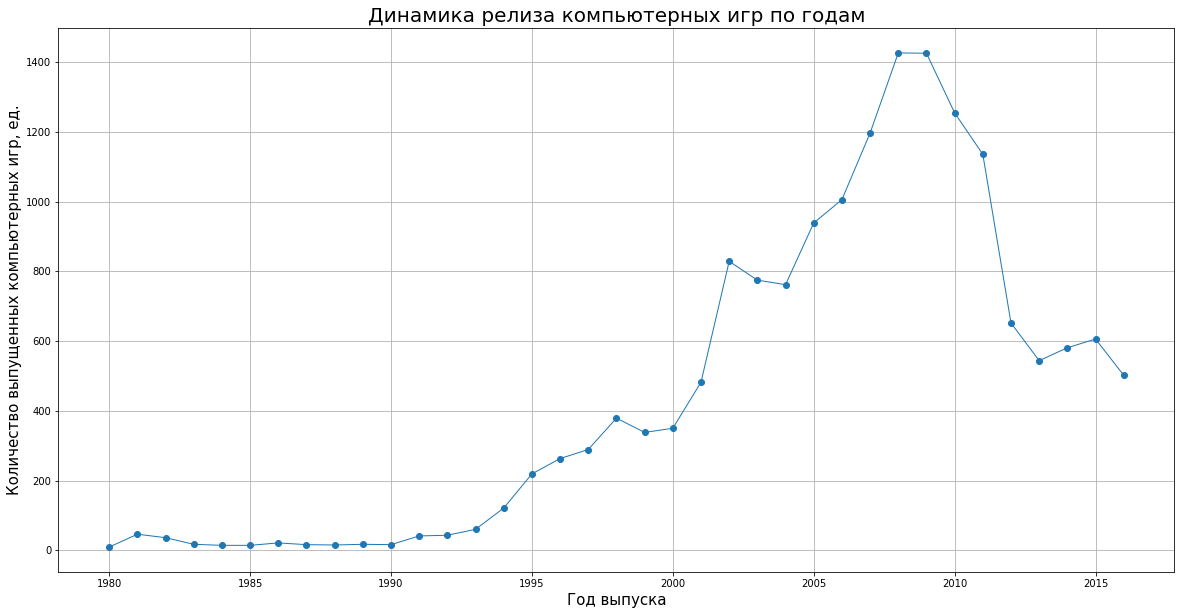

In [31]:
# строим график динамики выпуска компьютерных игр по годам

data.pivot_table(index='year_of_release', values='name', aggfunc='count').\
plot(linewidth = 1, style='o-', grid=True, figsize=(20, 10), legend=False);
plt.title('Динамика релиза компьютерных игр по годам', fontsize=20)
plt.xlabel('Год выпуска', fontsize=15)
plt.ylabel('Количество выпущенных компьютерных игр, ед.', fontsize=15);

In [32]:
# считаем количество выпущенных программ по годам и платформам

data.groupby(['platform', 'year_of_release'])['name'].count()

platform  year_of_release
2600      1980                9
          1981               46
          1982               36
          1983               11
          1984                1
                             ..
XB        2008                1
XOne      2013               19
          2014               61
          2015               80
          2016               87
Name: name, Length: 238, dtype: int64

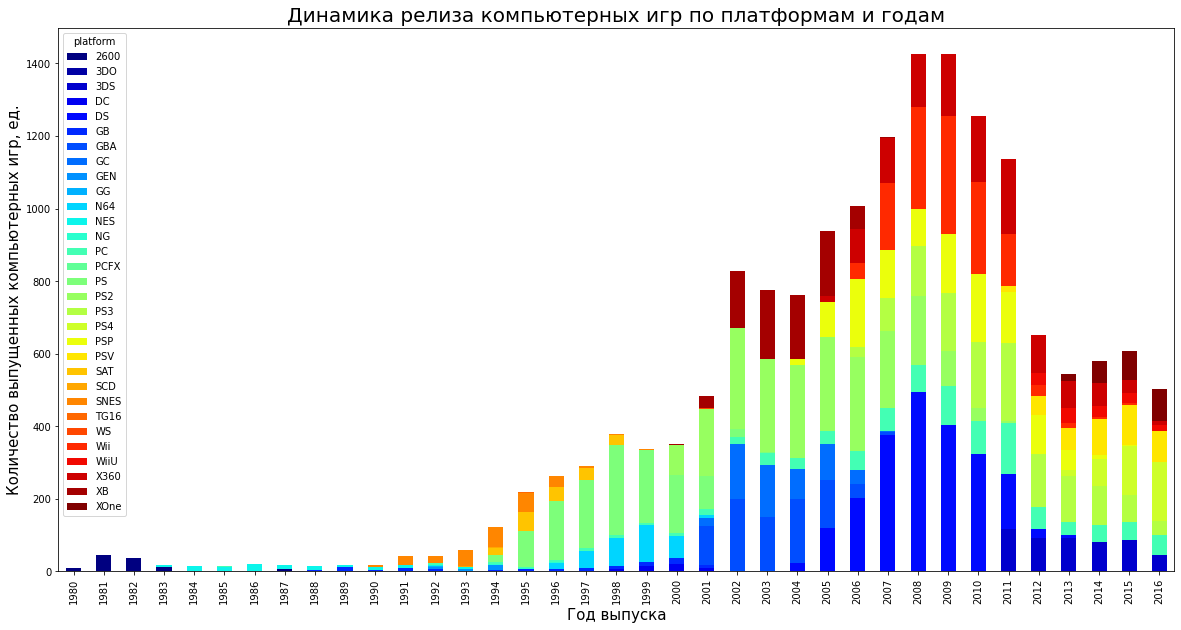

In [33]:
# строим график выпущенных программ по годам и платформам

colors = plt.cm.jet(np.linspace(0, 1, 31))
data.pivot_table(index='year_of_release', columns = 'platform', values='name', aggfunc='count').\
plot(kind='bar',color=colors, stacked=True, figsize=(20, 10));
plt.title('Динамика релиза компьютерных игр по платформам и годам', fontsize=20)
plt.xlabel('Год выпуска', fontsize=15)
plt.ylabel('Количество выпущенных компьютерных игр, ед.', fontsize=15);

Таким образом, в процессе анализа количества выпущенных компьютерных программ по годам вывлен рост показателя до 2009 г., с последующим снижением до 2016 г. При этом наиболее активным периодом является 2006-2011 гг., с пиковым значением 2008-2009 гг. Цветовая палитра отражает неравномерность участия платформ в количестве выпущенных игр по годам релизов.
Далее рассмотрим, как менялись продажи по платформам.

In [34]:
# анализируем платформы по продажам и сортируем платформы по суммарным продажам

data.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum().\
sort_values(by='total_sales', ascending=False)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
PS2,572.92,332.63,137.54,190.47,1233.56
X360,595.74,268.32,12.30,84.88,961.24
PS3,390.13,327.20,79.41,134.59,931.33
Wii,486.87,258.32,68.28,77.71,891.18
DS,380.31,188.41,175.02,59.04,802.78
PS,334.72,212.39,139.78,40.69,727.58
PS4,108.74,141.09,15.96,48.35,314.14
GBA,184.12,74.59,46.56,7.61,312.88
PSP,107.27,65.62,75.88,40.76,289.53


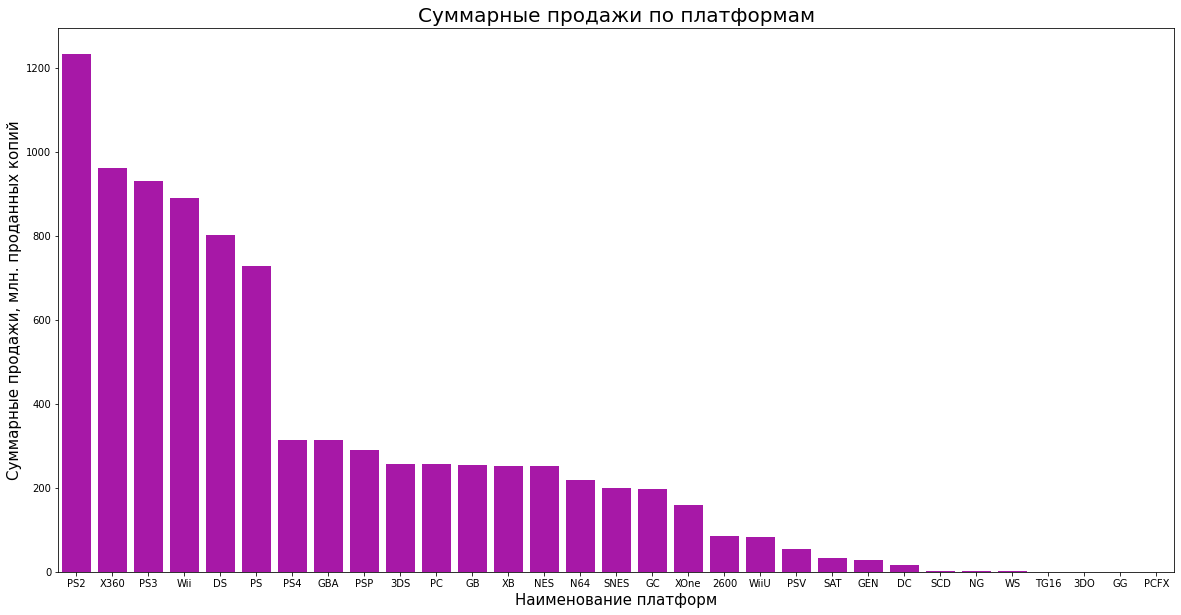

In [35]:
# визуализируем суммарные продажи

platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x=platform_sales.index,y=platform_sales['total_sales'], color='m')
plt.title('Суммарные продажи по платформам', fontsize=20)
plt.xlabel('Наименование платформ', fontsize=15)
plt.ylabel('Суммарные продажи, млн. проданных копий', fontsize=15);

Из приведенных данных следует, что наиболее востребованными платформами являются платформы PS2, X360, PS3, Wii, DS, PS. Но для анализа жизненного цикла платформы возьмем данные 10 востребованных платформ за 15 лет.

In [36]:
#  подготовим сводную таблицу для вывода данных с 2001 года

def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] > 2000)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .sort_values('year_of_release', ascending=False)
    return total

In [37]:
# отсортируем 10 наиболее востребованные платформы

top_10_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False).head(10)
top_10_platforms = top_10_platforms.reset_index().rename_axis(None, axis=1)

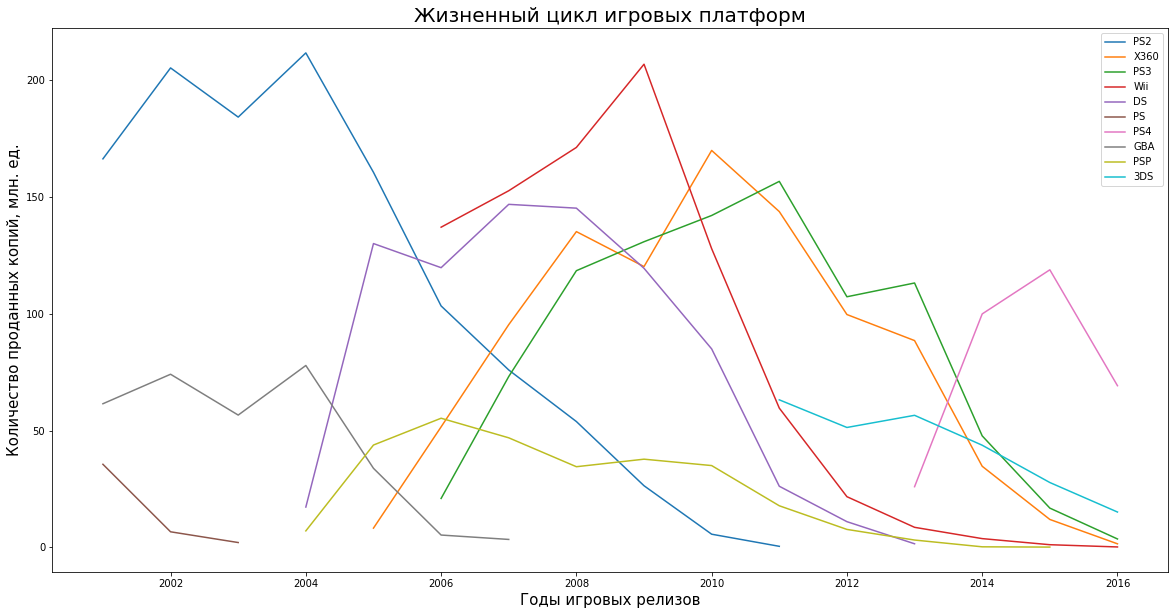

In [38]:
# построим график жизненного цикла игровых платформ

plt.figure(figsize=(20, 10))
plt.title('Жизненный цикл игровых платформ', fontsize=20)
plt.xlabel('Годы игровых релизов', fontsize=15)
plt.ylabel('Количество проданных копий, млн. ед.', fontsize=15)

for i in list(top_10_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,data)['total_sales'], label=i)
    plt.legend()

Для дальнейшего анализа актуальным периодом примем 5 лет, предполагая, что успешные платформы в этот период будут находиться в стадии роста или зрелости. Поскольку по условиям проекта данные за 2016 г. могут быть неполными, в актуальный период можно было включить 2011 г., но он относится к периоду высокого выпуска и будет несопоставим с анализируемым срезом.

In [39]:
# делаем срез данных за 2012-2016 гг.

data_2016 = data.query('year_of_release == [2012, 2013, 2014, 2015, 2016]')

In [40]:
# анализируем продажи по платформам за 2012-2016 гг.

data_2016.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum().\
sort_values(by='total_sales', ascending=False)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
PS4,108.74,141.09,15.96,48.35,314.14
PS3,103.38,106.85,35.29,43.26,288.78
X360,140.05,74.52,1.57,20.40,236.54
3DS,55.31,42.64,87.79,8.87,194.61
XOne,93.12,51.59,0.34,14.27,159.32
WiiU,38.10,25.13,13.01,5.95,82.19
PC,19.12,37.76,0.00,5.77,62.65
PSV,10.98,11.36,21.04,5.80,49.18
Wii,17.45,11.92,3.39,2.61,35.37


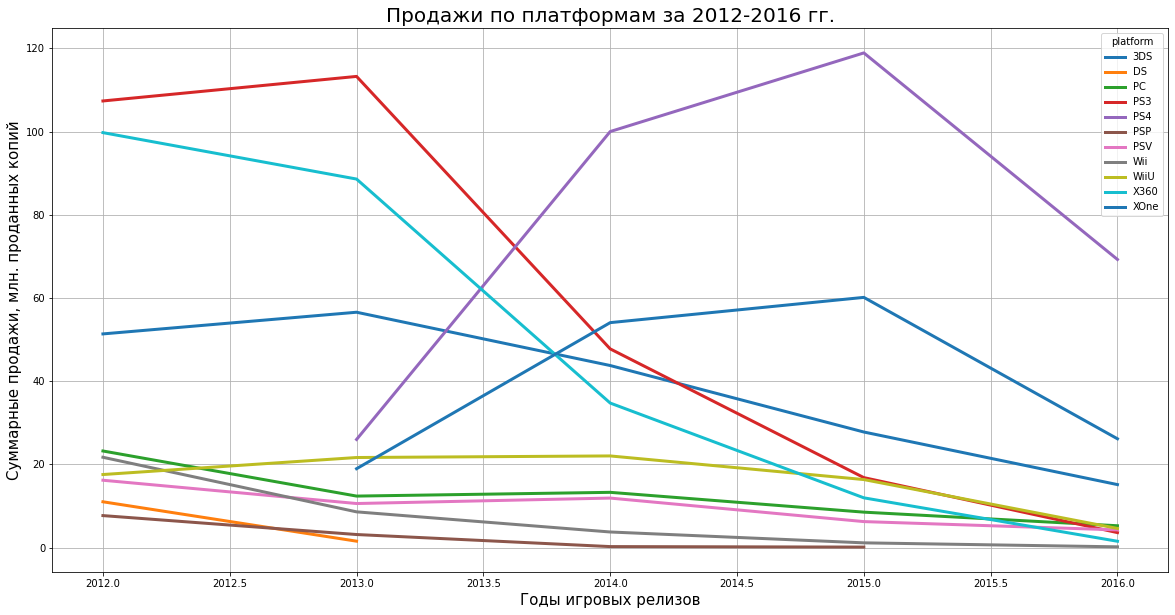

In [41]:
# строим график продаж по платформам за 2012-2016 гг.

data_2016.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').\
plot(grid=True, figsize=(20, 10), linewidth = 3);
plt.title('Продажи по платформам за 2012-2016 гг.', fontsize=20)
plt.xlabel('Годы игровых релизов', fontsize=15)
plt.ylabel('Суммарные продажи, млн. проданных копий', fontsize=15);

На графике наблюдаем снижение продаж у всех платформ, а также, что 2 платформы (PSP, DS) завершили продажи компьютерных игр. Таким образом, обновим срез данных по 5 наиболее востребованным платформам - PS4, PS3, X360, 3DS, XOne.

In [42]:
# срез данных по 5 наиболее востребованным платформам

data_2016_top = data_2016.query('platform == ["PS4", "PS3", "X360", "3DS", "XOne"]')

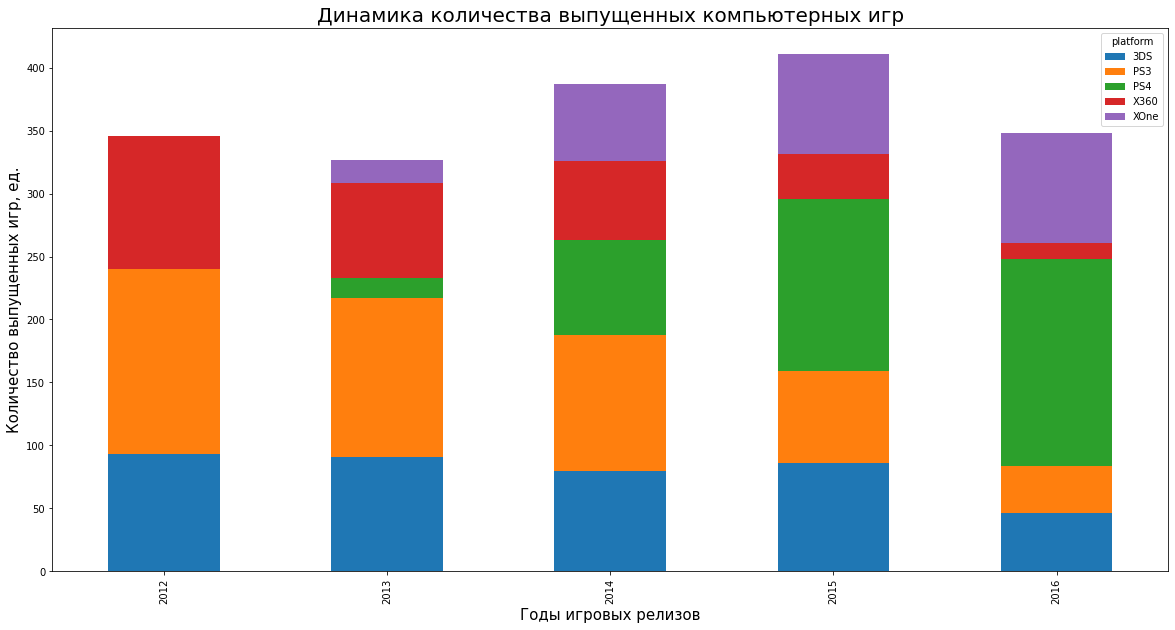

In [43]:
# оценим количество выпущенных компьютерных игр

data_2016_top.pivot_table(index='year_of_release', columns = 'platform', values='name', aggfunc='count').\
plot(kind='bar', stacked=True, figsize=(20, 10));
plt.title('Динамика количества выпущенных компьютерных игр', fontsize=20)
plt.xlabel('Годы игровых релизов', fontsize=15)
plt.ylabel('Количество выпущенных игр, ед.', fontsize=15);

На графике видно, что выпуск компьютерных игр в анализируемом периоде увеличивают платформы PS4 и XOne, а платформы PS3, X360, 3DS снижают.

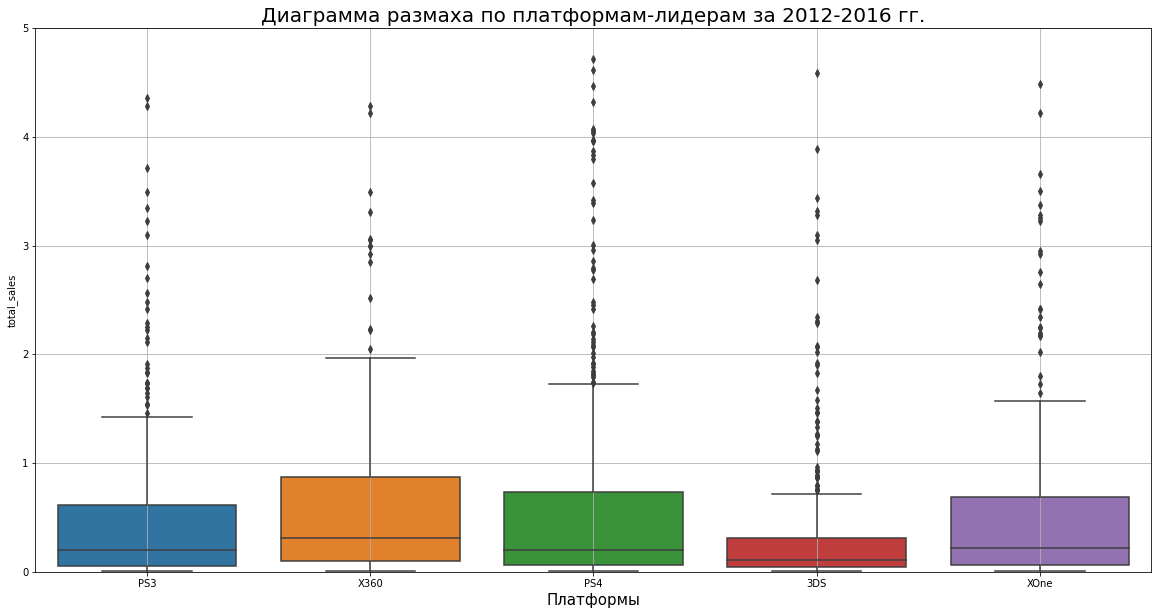

In [44]:
# диаграмма размаха по платформам-лидерам за 2012-2016 гг.

plt.figure(figsize=(20, 10))
sns.boxplot(x=data_2016_top['platform'], y=data_2016_top['total_sales'])
plt.ylim(0,5)
plt.grid(True)
plt.title('Диаграмма размаха по платформам-лидерам за 2012-2016 гг.', fontsize=20)
plt.xlabel('Платформы', fontsize=15);

По диаграмме размаха видно, что наиболее стабильные продажи в актуальном периоде наблюдались у платформы X360 (выше медианные значения, меньше выбросов), наименее устойчивые продажи у платформы 3DS. Платформы PS4, PS3 и XOne имеют схожую картину. Выбросы свидетельствуют о наличии аномально коммерчески успешных игр.

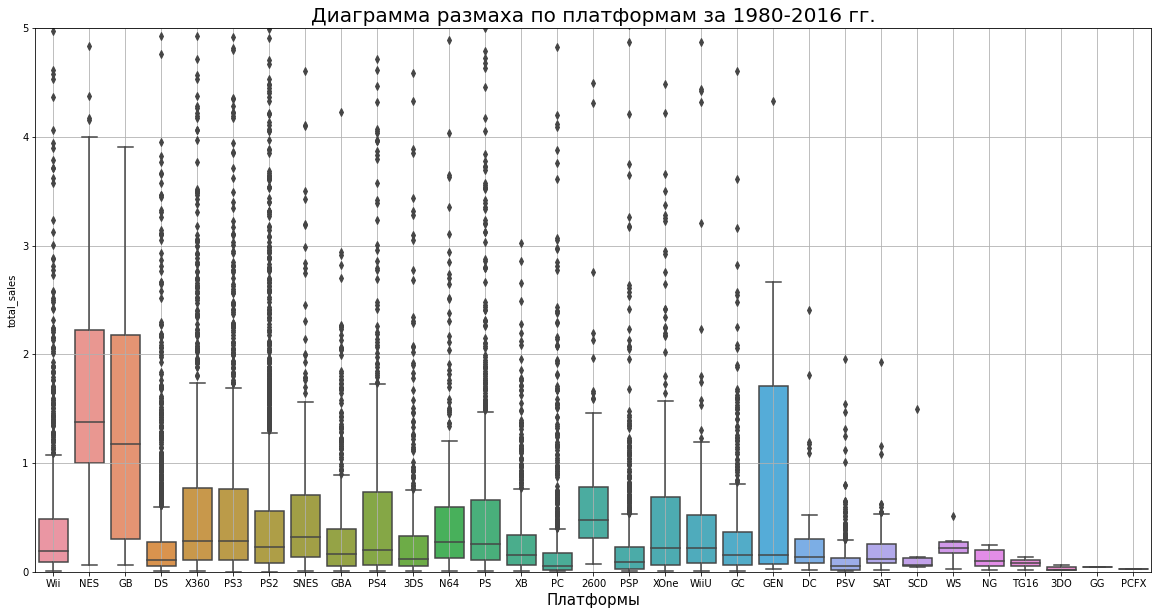

In [45]:
# диаграмма размаха по исходному датасету

plt.figure(figsize=(20, 10))
sns.boxplot(x=data['platform'], y=data['total_sales'])
plt.ylim(0,5)
plt.grid(True)
plt.title('Диаграмма размаха по платформам за 1980-2016 гг.', fontsize=20)
plt.xlabel('Платформы', fontsize=15);

Сравнение суммарных продаж в актуальным периоде с исходным датасетом свидетельствует о стабилизации показателей по анализируемым платформам, в частности о снижении числа выбросов.

In [46]:
# выберем PS4 как лидера по выпуску компьютерных игр и суммарным продажам

data_PS4 = data_2016_top.query('platform == "PS4"')

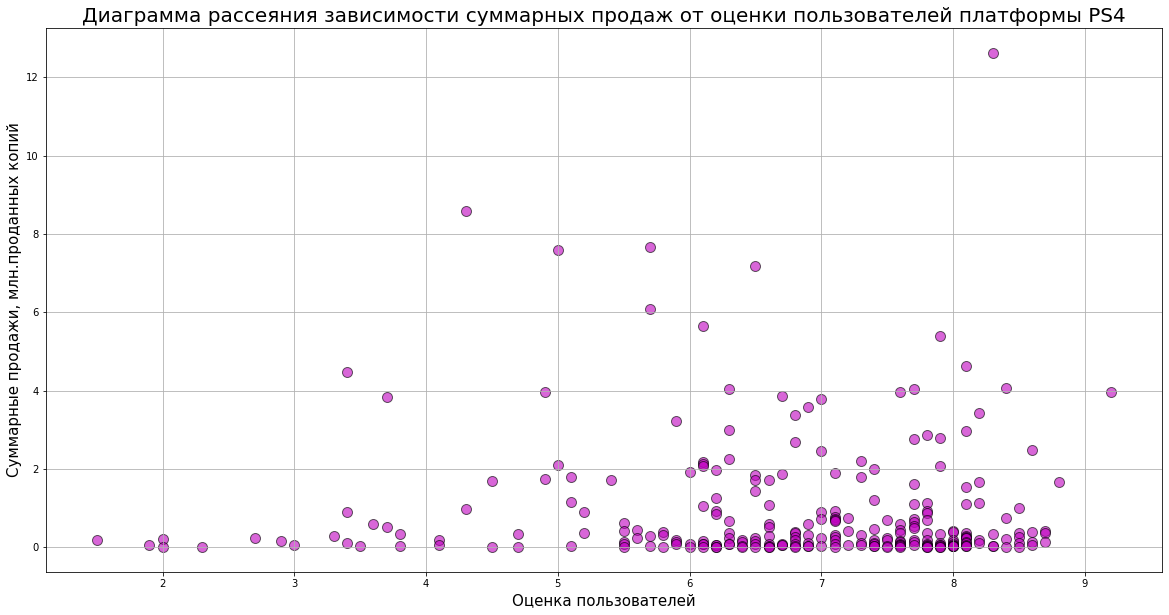

In [47]:
# строим диаграмму рассеяния зависимости суммарных продаж от оценки пользователей платформы PS4

data_PS4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.6, figsize=(20,10), grid=True,\
     marker = 'o', c = 'm', s = 100, edgecolors = 'black');
plt.title('Диаграмма рассеяния зависимости суммарных продаж от оценки пользователей платформы PS4', fontsize=20)
plt.xlabel('Оценка пользователей', fontsize=15)
plt.ylabel('Суммарные продажи, млн.проданных копий', fontsize=15);

In [48]:
# рассчитаем коэффициент корреляции суммарных продаж от оценки пользователей платформы PS4

data_PS4['total_sales'].corr(data_PS4['user_score'])

-0.031957110204556376

Коэффициент корреляции суммарных продаж от оценки пользователей платформы PS4 свидетельствует об отсутствии взаимосвязи данных показателей. 

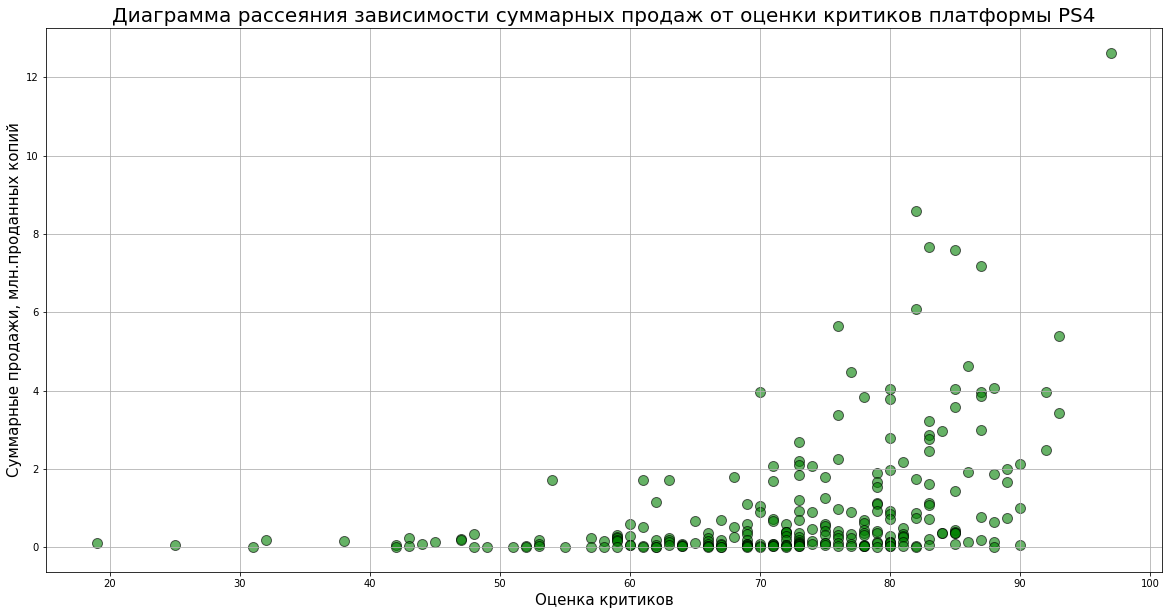

In [49]:
# строим диаграмму рассеяния зависимости суммарных продаж от оценки критиков платформы PS4

data_PS4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.6, figsize=(20,10), grid=True,\
     marker = 'o', c = 'g', s = 100, edgecolors = 'black');
plt.title('Диаграмма рассеяния зависимости суммарных продаж от оценки критиков платформы PS4', fontsize=20)
plt.xlabel('Оценка критиков', fontsize=15)
plt.ylabel('Суммарные продажи, млн.проданных копий', fontsize=15);

In [50]:
# рассчитаем коэффициент корреляции суммарных продаж от оценки критиков платформы PS4

data_PS4['total_sales'].corr(data_PS4['critic_score'])

0.406567902061781

Коэффициент корреляции суммарных продаж от оценки критиков платформы PS4 свидетельствует об умеренной связи данных показателей.

In [51]:
# функцию для построения диаграммы рассеивания и расчета коэффициента корреляции

def other_platform_matrix(name_of_platform):
    platform = data_2016_top[data_2016_top['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[1])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[0])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[1].set(xlabel='Оценка пользователей')
    ax[0].set(xlabel='Оценка критиков')
    ax[1].set(ylabel='Суммарные продажи')
    ax[0].set(ylabel='Суммарные продажи')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
       
    if 0.3 > critic_correl > 0:
        print('Корреляция между оценками критиков и продажами ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 > critic_correl >= 0.3:
        print('Корреляция между оценками критиков и продажами ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 > critic_correl >= 0.5:
        print('Корреляция между оценками критиков и продажами ', name_of_platform.upper(), ': Заметная', critic_correl)
    if 0.9 > critic_correl >= 0.7:
        print('Корреляция между оценками критиков и продажами ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между оценками критиков и продажами ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 0 > critic_correl >= -1:
        print('Корреляция между оценками критиков и продажами ', name_of_platform.upper(), ': Отрицательная', critic_correl)
    
    if 0.3 > correl > 0:
        print('Корреляция между оценками пользователей и продажами ', name_of_platform.upper(), ': Слабая', correl)
    if 0.5 > correl >= 0.3:
        print('Корреляция между оценками пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correl)
    if 0.7 > correl >= 0.5:
        print('Корреляция между оценками пользователей и продажами ', name_of_platform.upper(), ': Заметная', correl)
    if 0.9 > correl >= 0.7:
        print('Корреляция между оценками пользователей и продажами ', name_of_platform.upper(), ': Высокая', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между оценками пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', correl)
    if 0 > correl >= -1:
        print('Корреляция между оценками пользователей и продажами ', name_of_platform.upper(), ': Отрицательная', correl)

In [52]:
# платформы для анализа на взаимосвязь продаж с оценками пользователей и критиков

list_of_top = "PS3", "X360", "3DS", "XOne"

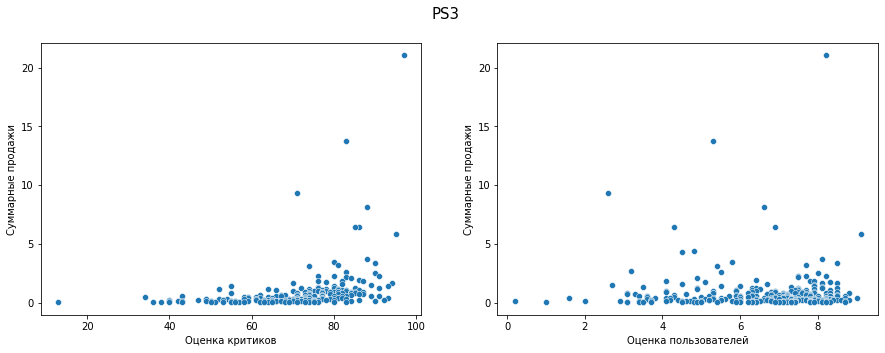

Корреляция между оценками критиков и продажами  PS3 : Умеренная 0.3341517575509856
Корреляция между оценками пользователей и продажами  PS3 : Отрицательная -0.006205767686051523


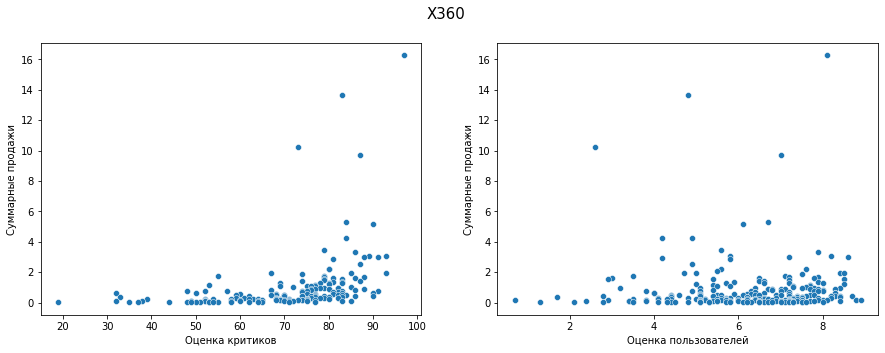

Корреляция между оценками критиков и продажами  X360 : Умеренная 0.3605734888507336
Корреляция между оценками пользователей и продажами  X360 : Слабая 0.006163978646213326


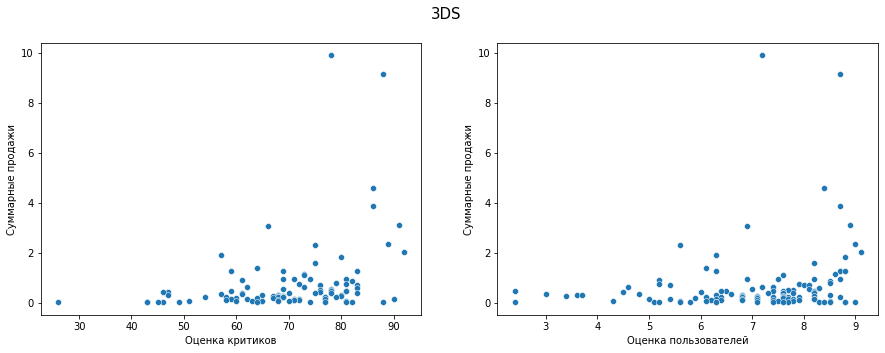

Корреляция между оценками критиков и продажами  3DS : Умеренная 0.3208028695360785
Корреляция между оценками пользователей и продажами  3DS : Слабая 0.19758263411038599


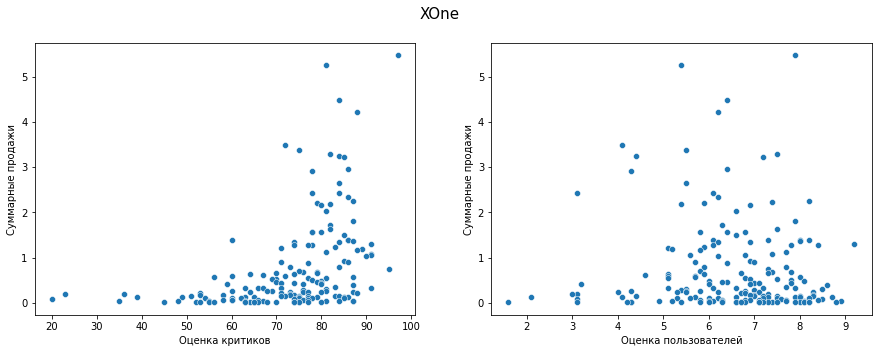

Корреляция между оценками критиков и продажами  XONE : Умеренная 0.4169983280084017
Корреляция между оценками пользователей и продажами  XONE : Отрицательная -0.06892505328279414


In [53]:
# С помощью цикла выведем 4 графика

for platform in list_of_top:
    other_platform_matrix(platform)

Таким образом, проанализировав взаимосвязь продаж от оценки пользователей и критиков по платформам PS4, PS3, X360, 3DS, XOne можно сделать вывод, что оценки пользователей не влияют на продажи компьютерных игр; при этом оценки критиков имеет умеренную связь и влияют на продажи компьютерных игр по всем наблюдаемым платформам.

In [54]:
# сводная таблица по продажам компьютерных игр в разрезе жанров

data_2016.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count', 'mean', 'median'])

,sum,count,mean,median
,total_sales,total_sales,total_sales,total_sales
genre,,,,
Action,441.12,1031,0.427856,0.120
Adventure,29.43,302,0.097450,0.030
Fighting,44.49,109,0.408165,0.130
Misc,85.04,192,0.442917,0.120
Platform,61.00,85,0.717647,0.210
Puzzle,4.89,28,0.174643,0.045
Racing,53.50,115,0.465217,0.140
Role-Playing,192.80,370,0.521081,0.140


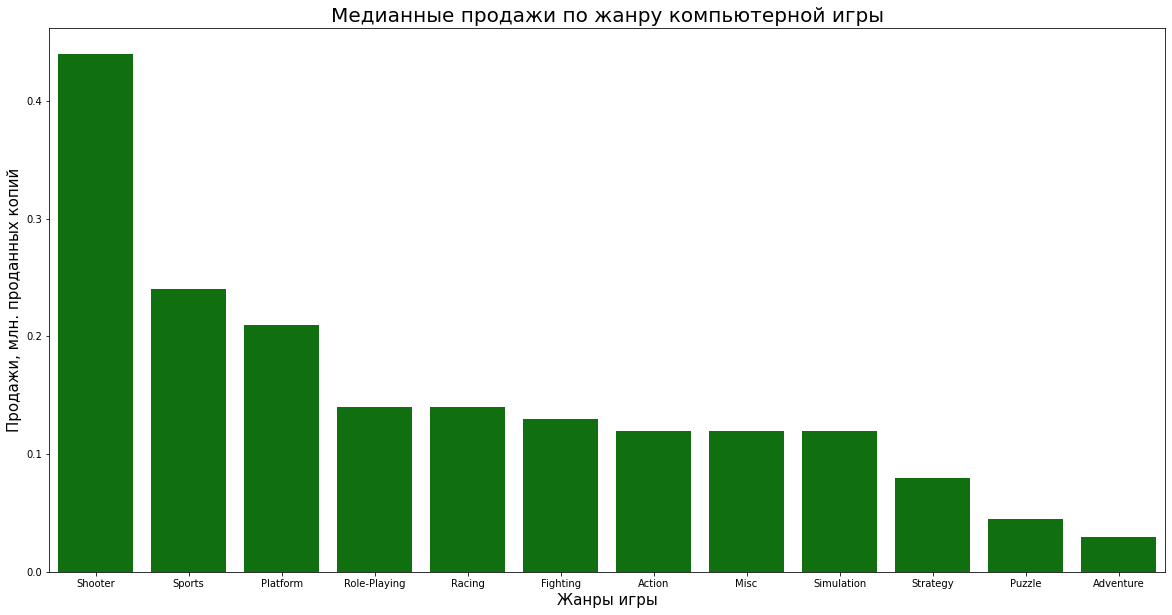

In [55]:
# визуализируем медианные продажи

genre_sales = data_2016.pivot_table(index='genre', values='total_sales', aggfunc='median').\
sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x=genre_sales.index,y=genre_sales['total_sales'], color='g')
plt.title('Медианные продажи по жанру компьютерной игры', fontsize=20)
plt.xlabel('Жанры игры', fontsize=15)
plt.ylabel('Продажи, млн. проданных копий', fontsize=15);

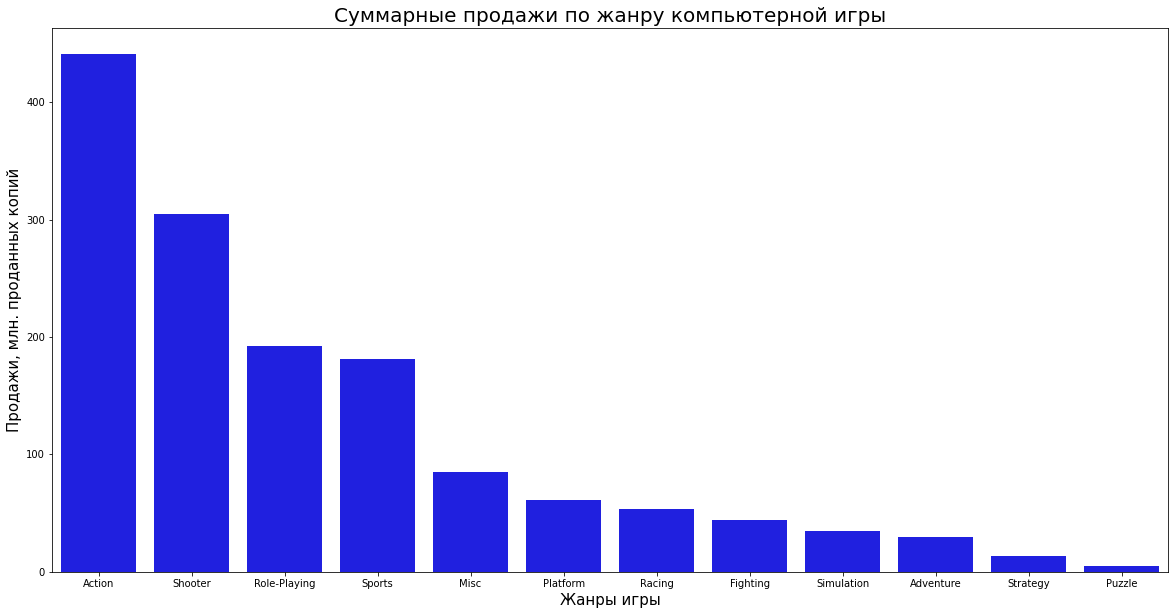

In [56]:
# визуализируем суммарные продажи

genre_sales = data_2016.pivot_table(index='genre', values='total_sales', aggfunc='sum').\
sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x=genre_sales.index,y=genre_sales['total_sales'], color='b')
plt.title('Суммарные продажи по жанру компьютерной игры', fontsize=20)
plt.xlabel('Жанры игры', fontsize=15)
plt.ylabel('Продажи, млн. проданных копий', fontsize=15);

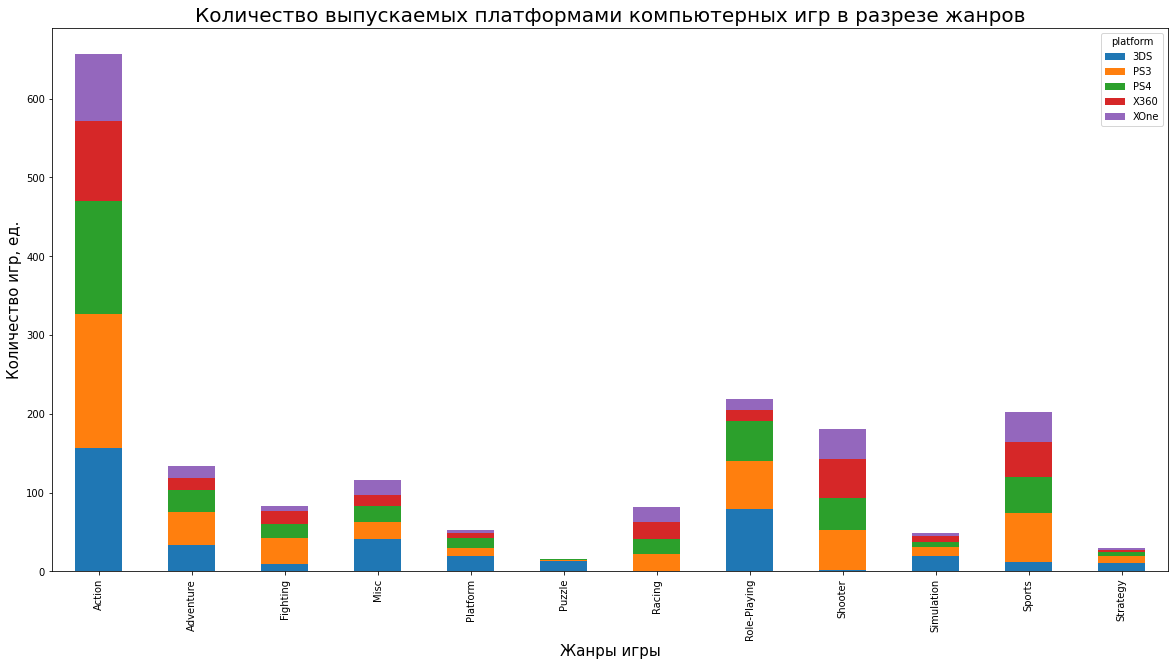

In [57]:
# диаграмма количества выпускаемых платформами компьютерных игр в разрезе жанров

data_2016_top.pivot_table(index='genre', columns = 'platform', values='name', aggfunc='count').\
plot(kind='bar', stacked=True, figsize=(20, 10));
plt.title('Количество выпускаемых платформами компьютерных игр в разрезе жанров', fontsize=20)
plt.xlabel('Жанры игры', fontsize=15)
plt.ylabel('Количество игр, ед.', fontsize=15);

Высокие суммарные продажи компьютерных игр в жанре Action обусловлены значительным (по сравнению с остальными жанрами) количеством выпущенных игр. Кроме того, жанр Action является комбинированным жанром, в котором могут сочетаться элементы Shooter (стрелялки), Fighting (рукопашный бой), Adventure (приключение) и др. При этом самые высокие медианные продажи демонстрируют игры в жанре Shooter (стрелялки), что говорит о стабильном высоком спросе на игры данного жанра. Также востребованными являются игры жанров Role-playing (ролевая игра), Sports (спортивные игры). Наименее популярными являются игры в жанре Strategy, Puzzle (головоломка).

### Вывод
1. Наиболее продуктивным по выпуску компьютерных программ является период с 2006 по 2011 гг., пик приходится на 2008-2009 гг.
2. Топ 5 востребованных за все года наблюдений платформ - PS2, X360, PS3, Wii, DS, PS.
3. Средний жизненный цикл игровой платформы составляет 10 лет, этап зрелости = 5 лет. Для анализа данных в сопоставимых условиях актуальным выбран период 2012-2016 гг.
4. На протяжении 2012-2016 гг. наиболее успешными по суммарным продажам являлись платформы PS4, PS3, X360, 3DS, XOne, но при этом суммарные продажи по платформам-лидерам снижаются к 2016 г.
5. Из востребованных в 2012-2016 гг. платформ выпуск компьютерных игр наращивают только платформы PS4 и XOne, по остальным платформам наблюдается снижение показателя.
6. PS4 - лидер по выпуску компьютерных программ и суммарным продажам.
7. Диаграммы рассеяния и коэффициенты корреляции свидетельствуют о том, что на продажи компьютерных игр умеренно влияет оценка критиков и не влияет оценка пользователей.
8. По совокупности факторов (выпускающие платформы, количественный выпуск, медианные и суммарные продажи) лидерами среди компьтерных игр являются игры жанров Action, Shooter.

## Портрет пользователя компьютерными играми

In [58]:
# сводная таблица по продажам игр в разных регионах в разрезе платформ

data_2016.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum().\
sort_values(by = 'total_sales', ascending = False)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
PS4,108.74,141.09,15.96,48.35,314.14
PS3,103.38,106.85,35.29,43.26,288.78
X360,140.05,74.52,1.57,20.40,236.54
3DS,55.31,42.64,87.79,8.87,194.61
XOne,93.12,51.59,0.34,14.27,159.32
WiiU,38.10,25.13,13.01,5.95,82.19
PC,19.12,37.76,0.00,5.77,62.65
PSV,10.98,11.36,21.04,5.80,49.18
Wii,17.45,11.92,3.39,2.61,35.37


Из таблицы видно, что топ-5 платформ по продажам отличается в зависимости от региона, особенно выделяется рынок Японии. Для того, чтобы проанализировать распределении доли платформ в разных регионах, создадим в датасете дополнительный столбец, куда занесем 7 наиболее популярные платформ, остальные сгруппируем в категорию other platforms.

In [59]:
# создаем новый столбец с платформами PS4, PS3, X360, 3DS, XOne, PSV

def type_platforms(row):
    if row['platform'] == '3DS':
        return '3DS'
    if row['platform'] == 'PS3':
        return 'PS3'
    if row['platform'] == 'PS4':
        return 'PS4'
    if row['platform'] == 'XOne':
        return 'XOne'
    if row['platform'] == 'X360':
        return 'X360'
    if row['platform'] == 'PSV':
        return 'PSV'
    if row['platform'] == 'WiiU':
        return 'WiiU'
    else:
        return 'other platforms'

data_2016['top_platforms'] = data_2016.apply(type_platforms, axis=1)


/tmp/ipykernel_48/3532304162.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016['top_platforms'] = data_2016.apply(type_platforms, axis=1)


In [60]:
# проверяем добавление нового столбца и типа платформ
data_2016.tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,top_platforms
16682,grisaia no kajitsu: la fruit de la grisaia,PSP,2013,Adventure,0.0,0.00,0.01,0.0,NaN,NaN,NaN,0.01,other platforms
16684,7'scarlet,PSV,2016,Adventure,0.0,0.00,0.01,0.0,NaN,NaN,NaN,0.01,PSV
16691,dynasty warriors: eiketsuden,PS3,2016,Action,0.0,0.00,0.01,0.0,NaN,NaN,NaN,0.01,PS3
16692,metal gear solid v: ground zeroes,PC,2014,Action,0.0,0.01,0.00,0.0,80.0,7.6,M,0.01,other platforms
16699,the longest 5 minutes,PSV,2016,Action,0.0,0.00,0.01,0.0,NaN,NaN,NaN,0.01,PSV
16703,strawberry nauts,PSV,2016,Adventure,0.0,0.00,0.01,0.0,NaN,NaN,NaN,0.01,PSV
16707,aiyoku no eustia,PSV,2014,Misc,0.0,0.00,0.01,0.0,NaN,NaN,NaN,0.01,PSV
16710,samurai warriors: sanada maru,PS3,2016,Action,0.0,0.00,0.01,0.0,NaN,NaN,NaN,0.01,PS3
16712,haitaka no psychedelica,PSV,2016,Adventure,0.0,0.00,0.01,0.0,NaN,NaN,NaN,0.01,PSV
16714,winning post 8 2016,PSV,2016,Simulation,0.0,0.00,0.01,0.0,NaN,NaN,NaN,0.01,PSV


In [61]:
# сводная таблица продаж в разрезе платформ и регионов

data_2016.groupby(['top_platforms'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
top_platforms,,,,,
3DS,55.31,42.64,87.79,8.87,194.61
PS3,103.38,106.85,35.29,43.26,288.78
PS4,108.74,141.09,15.96,48.35,314.14
PSV,10.98,11.36,21.04,5.80,49.18
WiiU,38.10,25.13,13.01,5.95,82.19
X360,140.05,74.52,1.57,20.40,236.54
XOne,93.12,51.59,0.34,14.27,159.32
other platforms,41.29,53.63,17.58,9.26,121.76


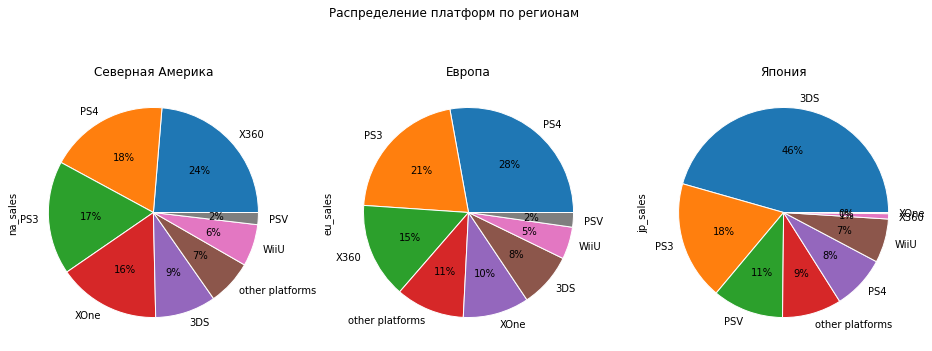

In [62]:
# построим диаграмму распределения популярных платформ по регионам

fig, axes = plt.subplots(1, 3, sharex=True, figsize=(16, 6))
fig.suptitle('Распределение платформ по регионам')
axes[0].set_title('Северная Америка')
axes[1].set_title('Европа')
axes[2].set_title('Япония')

data_2016.pivot_table(index=['top_platforms'],
                  values='na_sales',
                  aggfunc='sum')\
.sort_values(by='na_sales', ascending=False).\
plot(ax=axes[0],
      kind='pie',
      y='na_sales',
      autopct='%1.0f%%',
      legend=False,
      wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });

data_2016.pivot_table(index=['top_platforms'],
                  values='eu_sales',
                  aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False).\
plot(ax=axes[1],
      kind='pie',
      y='eu_sales',
      autopct='%1.0f%%',
      legend=False,
      wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });

data_2016.pivot_table(index=['top_platforms'],
                  values='jp_sales',
                  aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False).\
plot(ax=axes[2],
      kind='pie',
      y='jp_sales',
      autopct='%1.0f%%',
      legend=False,
      wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });


Таким образом, топ-5 платформ по регионам в порядке убывания выглядит следующим образом: 
- X360, PS4, PS3, XOne, 3DS - Северная Америка;
- PS4, PS3, X360, XOne, 3DS - Европа;
- 3DS, PS3, PSV, PS4, WiiU  - Япония;
- PS4, PS3, 3DS - популярные площадки во всех регионах. 

In [63]:
# сводная таблица продаж в разрезе жанров и регионов

data_2016.groupby(['genre'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
genre,,,,,
Action,177.84,159.34,52.80,51.14,441.12
Adventure,8.92,9.46,8.24,2.81,29.43
Fighting,19.79,10.79,9.44,4.47,44.49
Misc,38.19,26.32,12.86,7.67,85.04
Platform,25.38,21.41,8.63,5.58,61.00
Puzzle,1.13,1.40,2.14,0.22,4.89
Racing,17.22,27.29,2.50,6.49,53.50
Role-Playing,64.00,48.53,65.44,14.83,192.80
Shooter,144.77,113.47,9.23,37.26,304.73


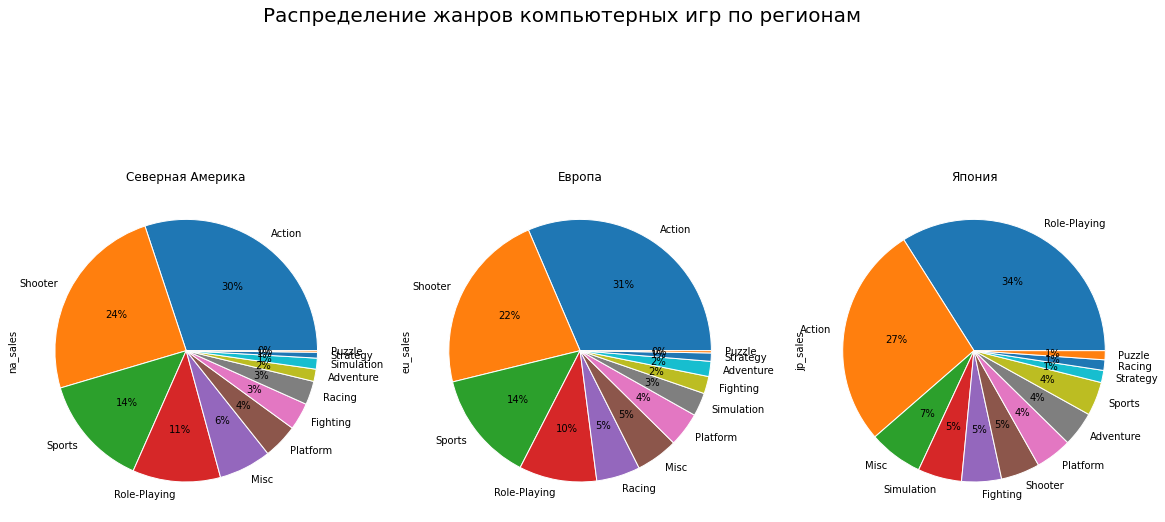

In [64]:
# построим диаграмму распределения жанров игр по регионам

fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20, 10))
fig.suptitle('Распределение жанров компьютерных игр по регионам', fontsize=20)
axes[0].set_title('Северная Америка')
axes[1].set_title('Европа')
axes[2].set_title('Япония')

data_2016.pivot_table(index=['genre'],
                  values='na_sales',
                  aggfunc='sum')\
.sort_values(by='na_sales', ascending=False)\
.plot(ax=axes[0],
      kind='pie',
      y='na_sales',
      autopct='%1.0f%%',
      legend=False,
      wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });

data_2016.pivot_table(index=['genre'],
                  values='eu_sales',
                  aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False)\
.plot(ax=axes[1],
      kind='pie',
      y='eu_sales',
      autopct='%1.0f%%',
      legend=False,
      wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });

data_2016.pivot_table(index=['genre'],
                  values='jp_sales',
                  aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False)\
.plot(ax=axes[2],
      kind='pie',
      y='jp_sales',
      autopct='%1.0f%%',
      legend=False,
      wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });

Таким образом, топ-5 жанров по регионам в порядке убывания выглядит следующим образом:

- Action, Shooter, Sports, Role-Playing, Misc - Северная Америка;
- Action, Shooter, Sports, Role-Playing, Racing - Европа;
- Role-Playing, Action, Misc, Simulation, Fighting - Япония;
- Action, Role-Playing востребованы в каждом регионе.

In [65]:
# сводная таблица продаж в разрезе возрастных категорий и регионов

data_2016.groupby(['rating'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
rating,,,,,
E,117.79,115.39,29.27,32.09,294.54
E10+,77.84,57.92,8.57,16.87,161.20
M,239.96,202.99,22.20,66.28,531.43
T,69.80,57.04,29.13,19.51,175.48


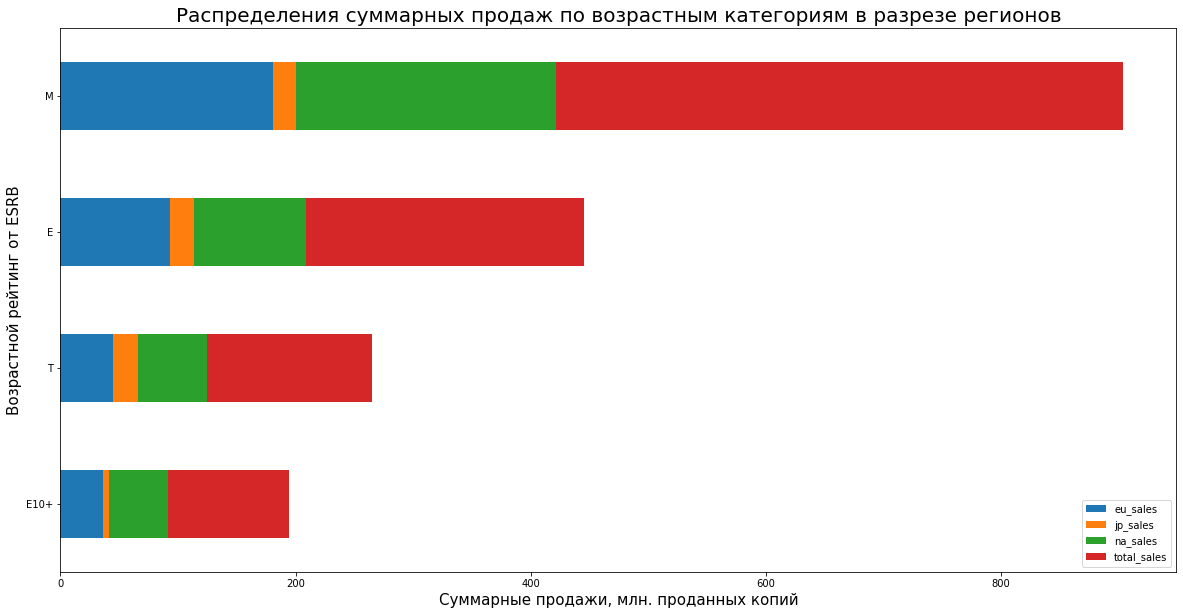

In [66]:
# строим график распределения суммарных продаж по возрастным категориям 

data_2016_top.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc='sum').\
sort_values(by = 'total_sales', ascending = True).\
plot(kind='barh', stacked=True, figsize=(20, 10));
plt.title('Распределения суммарных продаж по возрастным категориям в разрезе регионов', fontsize=20)
plt.xlabel('Суммарные продажи, млн. проданных копий', fontsize=15)
plt.ylabel('Возрастной рейтинг от ESRB', fontsize=15);

В анализируемом датасете представлены категории рейтинг игр ESRB: 
- «M» («Mature») — «Для взрослых»: материалы игры не подходят для лиц младше 17 лет;
- «E» («Everyone») — «Для всех»: содержание вполне подходит для всех возрастов;
- «T» («Teen») — «Подросткам»: игра подходит для лиц от 13 лет;
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».
На построенном графике видно, что возрастная категория имеет влияние на суммарные продажи по регионам:
- в Европе и Северной Америке самые большие продажи приходятся на категорию игр «M», «E», «T», «E10+» в порядке убывания;
- в Японии продажи равномерно распределены по категориям «M», «E», «T», меньше продаж в категории «E10+».

### Вывод
1. Объем рынка компьютерных игр в Японии не сопоставим с продажами в Северной Америке и Европе, т.к. речь идет о сравнении отдельного государства и регионов, объединяющих несколько государств;
2. Рынок компьютерных игр в Северной Америке и Европе во многом похож, в Японии имеет характерные особенности;
3. Портрет пользователя в Японии: платформы 3DS, PS3, PSV, PS4, WiiU; жанры Role-Playing, Action, Misc, Simulation, Fighting; равномерно распределены по возрастным категориям «M», «E», «T», меньше продаж в категории «E10+»;
4. Портрет пользователя в Европе: платформы PS4, PS3, X360, XOne, 3DS; жанры Action, Shooter, Sports, Role-Playing, Racing; возрастные категории «M», «E», «T», «E10+» в порядке убывания;
5. Портрет пользователя в Северной Америке: платформы X360, PS4, PS3, XOne, 3DS; жанры Action, Shooter, Sports, Role-Playing, Misc; возрастные категории «M», «E», «T», «E10+» в порядке убывания;
6. Общие категории: платформы PS4, PS3, 3DS; жанры Action, Role-Playing; максимально продаж в возрастной категории «M».

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- H0 = Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1 = Средние пользовательские рейтинги платформ Xbox One и PC разные

In [67]:
data_xbox = data_2016[data_2016['platform'] == 'XOne']
data_pc = data_2016[data_2016['platform'] == 'PC']

xbox = data_xbox['user_score']
pc = data_pc['user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(xbox, pc, equal_var=False, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5489537965134987
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные

- H0 = Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1 = Средние пользовательские рейтинги жанров Action и Sports разные

In [68]:
data_act = data_2016[data_2016['genre'] == 'Action']
data_sp = data_2016[data_2016['genre'] == 'Sports']

action = data_act['user_score']
sport = data_sp['user_score']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(action, sport, equal_var=False, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 5.98945806646755e-20
Отвергаем нулевую гипотезу


### Вывод
1. Нулевые гипотезы были сформулированы с точки средния равенства:
- средних пользовательских рейтингов платформ Xbox One и PC;
- средних пользовательских рейтингов жанров Action и Sports.
2. Альтернативные гипотезы сформулированы с точки зрения неравенства:
- средних пользовательских рейтингов платформ Xbox One и PC;
- средних пользовательских рейтингов жанров Action и Sports.
3. Альтернативная гипотеза предполагает возможное отклонение и в большую, и в меньшую стороны, поэтому является двусторонней. 
4. Так как проверяются гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применен критерий ttest_ind().
5. В данных, необходимых для анализа, имелись пропущенные значения. Использован параметр nan_policy='omit'. 
6. Применено «правило большого пальца»: предполагая, что выборки разного размера, указан equal_var= False при вызове метода scipy.stats.ttest_ind().

# Общий вывод
- Исходный датасет содержал данные с 1980 по 2016 гг. включительно. Данный временной отрезок отражает историю развития компьютерных игр, включая рост рынка до 2009 г. с последующим его снижением, отражающемся не только в продажах, но и в релизах новых компьютерных программ. 
- Падение рынка компьютерных игр после 2009 г. может быть связано с развитием конкурентного рынка мобильных игр на базе развития смартфонов, операторов мобильной связи, магазинов мобильных приложений. 
- При формулировании цели рекламной кампании стоит определиться со стратегией - развивать региональные рынки с учетом их особенностей, отраженных в п. 4.1, либо установить приоритет в виде платформ, жанров компьютерных игр, востребованных во всех регионах. По совокупности факторов лидируют платформы PS4, PS3, 3DS; жанры Action, Role-Playing, а также Shooter.
- Анализ продемонстрировал отсутствие зависимости продаж от оценки пользователей, поэтому рекламную информацию стоит формулировать с поддержкой экспертного сообщества (выявлена умеренная взаимосвязь продаж от оценки критиков). 
- Целевая аудитория рекламной кампании по продвижению компьютерных игр в возрастной категории «M», «E» (для взрослых и для всех соответственно).
- В целях планирования рекламной кампании рекомендуется проанализировать каналы получения информации потенциальных покупателей для выбора средств рекламы.
- Поскольку жизненный цикл платформ в среднем 10 лет с достижением зрелости в 5 лет, стоит искать растущие перспективные платформы. 